# Face Recognition
## haar cascade, LBP histogram based.


In [2]:
pip install --user opencv-contrib-python==4.3.0.36

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import cv2 #4.2.0
import os
import matplotlib.pyplot as plt

In [4]:
model = cv2.face.LBPHFaceRecognizer_create()
#model = cv2.face.EigenFaceRecognizer_create()
#model = cv2.face.FisherFaceRecognizer_create()

In [5]:
detector= cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [6]:
face_db = [
 "img1.jpg",
 "img3.jpg",
 "img8.jpg",
 "img14.jpg",
 "img20.jpg",
 "img21.jpg",
 "SGC2.jpg"
]

In [7]:
def detect_face(img_path):
    img = cv2.imread(img_path)
    
    detected_faces = detector.detectMultiScale(img, 1.3, 5)
    x, y, w, h = detected_faces[0] 
    
    img = img[y:y+h, x:x+w]
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    return img

In [8]:
faces = []
for img_path in face_db:
 print(img_path)
 img = detect_face(img_path)
 faces.append(img)
 
ids = np.array([i for i in range(0, len(faces))])

img1.jpg
img3.jpg
img8.jpg
img14.jpg
img20.jpg
img21.jpg
SGC2.jpg


In [9]:
model.train(faces, ids)
model.write("model.yml")

In [10]:
model.read("model.yml")

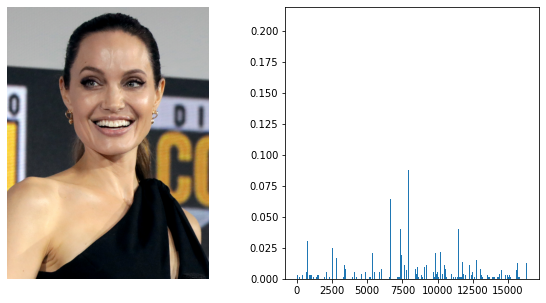

-----------------------


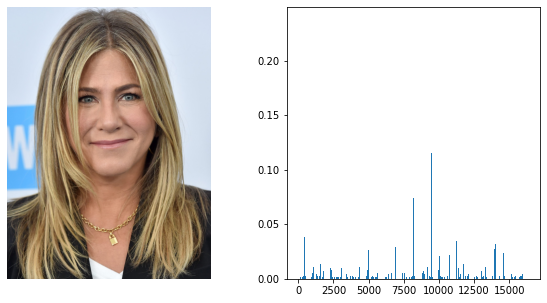

-----------------------


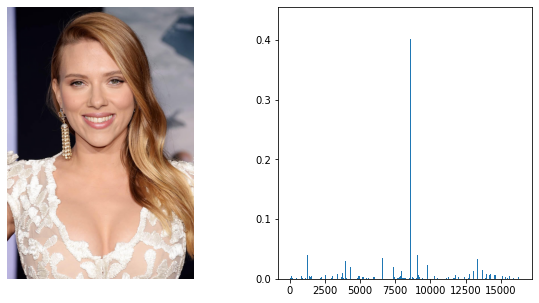

-----------------------


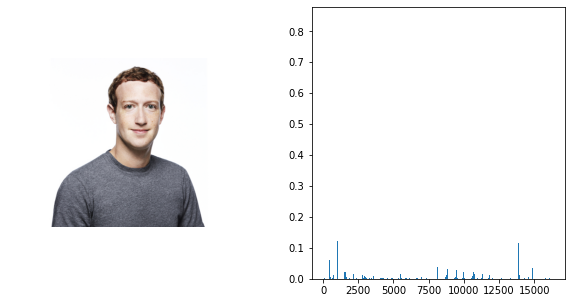

-----------------------


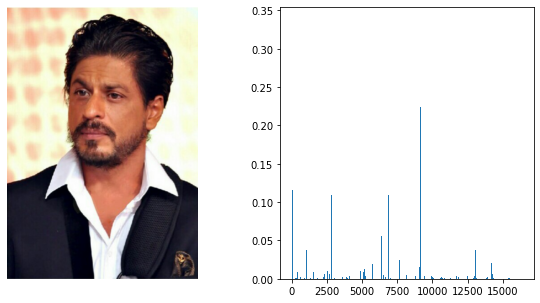

-----------------------


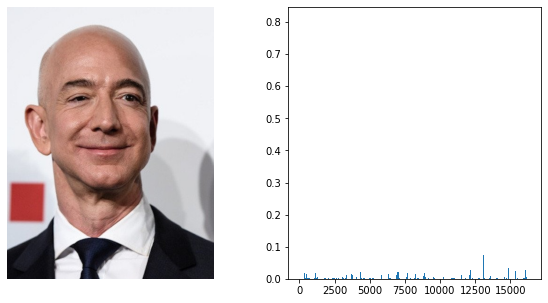

-----------------------


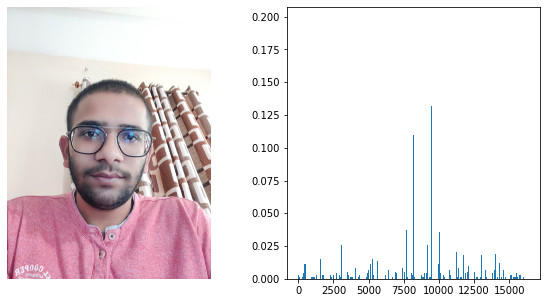

-----------------------


In [11]:
if True:
    histograms = model.getHistograms()

    for i in range(0, len(face_db)):
        histogram = histograms[i][0]
        
        
        
        axis_values = np.array([i for i in range(0, len(histogram))])

        fig = plt.figure(figsize=(10, 5))
        
        ax1 = fig.add_subplot(1,2,1)
        plt.imshow(cv2.imread(face_db[i])[:,:,::-1])
        plt.axis('off')
        
        ax1 = fig.add_subplot(1,2,2)
        plt.bar(axis_values, histogram)
        plt.show()
        print("-----------------------")

Found:  SGC2.jpg
Similarity index:  47.81836089103461


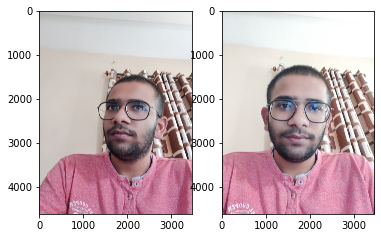

In [15]:
target_path = "SGC1.jpg"
 
target = detect_face(target_path)
idx, sim_idx = model.predict(target)
 
print("Found: ", face_db[idx])
print("Similarity index: ", sim_idx)
 
#--------------------
 
fig = plt.figure()
 
ax1 = fig.add_subplot(1,2,1)

plt.imshow(cv2.imread(target_path)[:,:,::-1])
plt.axis('on')
 
ax2 = fig.add_subplot(1,2,2)

plt.imshow(cv2.imread(face_db[idx])[:,:,::-1])
plt.axis('on')
 
plt.show()

In [ ]:
#img22=img21 jeff bezoz
#img7=img10 angelina joolie
#img15=img14 mark zuckerberg